In [1]:
import os
import conda
from pathlib import Path
import pathlib

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
# import netCDF4 as nc
# from netCDF4 import Dataset
import netCDF4
import matplotlib.pyplot as plt
import numpy as np
# import cartopy.crs as ccrs

In [16]:
this_dir=Path.cwd()
data_dir=data_dir = this_dir / Path('2021 Sample Data')
data_dir

WindowsPath('C:/Users/Pearl/Desktop/Polar Studies/Diss/Data/2021 Sample Data')

In [14]:
file_name = 't2m.KNMI-2021.XPEN055.ERA5-3H_RACMO2.3p2.3H.nc'
file=(data_dir / Path(file_name))
file=str(file.as_posix())
file

'C:/Users/Pearl/Desktop/Polar Studies/Diss/2021 Sample Data/t2m.KNMI-2021.XPEN055.ERA5-3H_RACMO2.3p2.3H.nc'

In [5]:
ds = netCDF4.Dataset(file_name, mode='r')
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.4
    source: RACMO2
    Domain: XPEN055
    Experiment: ERA5-3H_RACMO2.3p2
    institution: Royal Netherlands Meteorological Institute (KNMI)
    CreationDate: Tue May 11 13:48:42 2021
    comment: asim2cdf: cpar=t2m, iwmo=11, ilvt=105, ilev=2, idh=3, ihacc=0, ihstep=3, itmode=-1, ivmode=0
    title: 2-m Temperature
    dimensions(sizes): rlon(390), rlat(294), height(1), time(472), bnds(2), nblock1(40), nblock2(400)
    variables(dimensions): float64 lon(rlat, rlon), float64 lat(rlat, rlon), float64 dir(rlat, rlon), float64 rlon(rlon), float64 rlat(rlat), float64 height(height), int32 block1(nblock1), int32 block2(nblock2), float64 time(time), float64 time_bnds(time, bnds), int32 dtg(time), int32 date_bnds(time, bnds), int32 hms_bnds(time, bnds), int32 assigned(time), float32 rotated_pole(), float32 t2m(time, height, rlat, rlon)
    groups: 


In [6]:
lats = ds.variables['lat'][:]
lons = ds.variables['lon'][:]


In [7]:
# Get some parameters for the Stereographic Projection
lon_0 = lons.mean()
lat_0 = lats.mean()

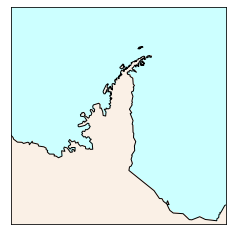

In [8]:
map = Basemap(projection='merc',llcrnrlon=lons.min()-1.,llcrnrlat=lats.min()-1.,urcrnrlon=lons.max()+1,urcrnrlat=lats.max()+1.,resolution='l')
map.drawcoastlines()
map.drawlsmask(land_color='Linen', ocean_color='#CCFFFF')


In [9]:
time= ds.variables['time']
time

# time_var = ds.variables['time']
# dtime = nc.num2date(time_var[:],time_var.units)

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    axis: T
    units: days since 1950-01-01 00:00:00.0
    long_name: time
    dtgstart: 2021010100
    bounds: time_bnds
    calendar: standard
unlimited dimensions: time
current shape = (472,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [10]:
timedtg= ds.variables['dtg']
timedtg

<class 'netCDF4._netCDF4.Variable'>
int32 dtg(time)
    long_name: Verifying Datum-Time Group at Start of Interval
    units: yyyymmddhh
unlimited dimensions: time
current shape = (472,)
filling on, default _FillValue of -2147483647 used

In [11]:
temp2m= ds.variables['t2m']
temp2m

<class 'netCDF4._netCDF4.Variable'>
float32 t2m(time, height, rlat, rlon)
    standard_name: air_temperature
    long_name: 2-m Temperature
    units: K
    cell_methods: time: instantaneous values
    grid_mapping: rotated_pole
    coordinates: lon lat
    _FillValue: -9999.0
unlimited dimensions: time
current shape = (472, 1, 294, 390)
filling on

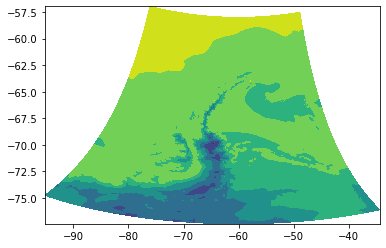

In [12]:
temp2m_day1=temp2m[0,0,:,:]
plt.contourf(lons, lats, temp2m_day1)

In [12]:
# # loop for 365 days 
# days = np.arange(0,100)
# # creating meshgrid from our list of spatial coordinates
# # ds.close()
# lon, lat = np.meshgrid(lons[:100],lats[:100])

In [13]:
# ds.variables['lat']

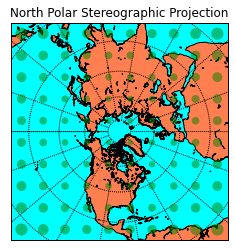

In [14]:
m =Basemap(projection='npstere',boundinglat=10,lon_0=270,resolution='l')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='aqua')
# draw tissot's indicatrix to show distortion.
ax = plt.gca()
for y in np.linspace(m.ymax/20,19*m.ymax/20,10):
    for x in np.linspace(m.xmax/20,19*m.xmax/20,10):
        lon, lat = m(x,y,inverse=True)
        poly = m.tissot(lon,lat,2.5,100,\
                        facecolor='green',zorder=10,alpha=0.5)
plt.title("North Polar Stereographic Projection")
plt.show()

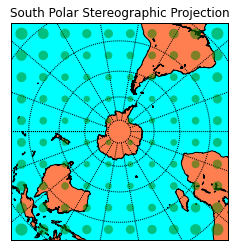

In [15]:
m = Basemap(projection='spstere',boundinglat=-10,lon_0=90,resolution='l')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='aqua')
# draw tissot's indicatrix to show distortion.
ax = plt.gca()
for y in np.linspace(19*m.ymin/20,m.ymin/20,10):
    for x in np.linspace(19*m.xmin/20,m.xmin/20,10):
        lon, lat = m(x,y,inverse=True)
        poly = m.tissot(lon,lat,2.5,100,\
                        facecolor='green',zorder=10,alpha=0.5)
plt.title("South Polar Stereographic Projection")
plt.show()